# Week 5 - Implementing Recurrent Neural Networks for time series forecasting and stock market prediction
# August 31, 2023.

## Q1)A) Create a dataset of 10000 samples with 51 time steps each.

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, SimpleRNN
from sklearn.model_selection import train_test_split
def generate_time_series(sample_size, n_steps):
    freq1, freq2, offsets1, offsets2=np.random.rand(4, sample_size, 1)
    time=np.linspace(0, 1, n_steps)
    series=0.5*np.sin((time-offsets1)*(freq1*10+10))
    series+=0.2*np.sin((time-offsets2)*(freq2*20+10))
    series+=0.1*(np.random.rand(sample_size, n_steps)-0.5)
    return series[..., np.newaxis].astype(np.float32)
data=generate_time_series(10000,51)

## B) Split the dataset in the ratio training: validation: testing = 70:20:10.

In [2]:
X=data[:,:50]
Y=data[:,50:51] # Last column as the label
from sklearn.preprocessing import OneHotEncoder
# Spliting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)
# Performing One hotencoding on the labels
encoder=OneHotEncoder(sparse=False)
y_train_encoded=encoder.fit_transform(Y_train.reshape(-1,1))
y_test_encoded=encoder.fit_transform(Y_test.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## C) Design, train, test and compare the performances of the following on the prediction of the
## value of 51st time step in the generated time series.
### a. Fully connected neural network.

In [3]:
# Shape of the dataset
print(X_train.shape)
print(y_train_encoded.shape)

(9000, 50, 1)
(9000, 9000)


In [4]:
model=Sequential()
model.add(Flatten(input_shape=(50,1,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [5]:
history1=model.fit(X_train,y_train_encoded,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 13s 10ms/step - loss: 0.0464 - val_loss: 0.0465
Epoch 2/20
225/225 [==============================] - 2s 9ms/step - loss: 0.0434 - val_loss: 0.0434
Epoch 3/20
225/225 [==============================] - 2s 10ms/step - loss: 0.0406 - val_loss: 0.0405
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0379 - val_loss: 0.0378
Epoch 5/20
225/225 [==============================] - 2s 7ms/step - loss: 0.0354 - val_loss: 0.0353
Epoch 6/20
225/225 [==============================] - 1s 6ms/step - loss: 0.0331 - val_loss: 0.0329
Epoch 7/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0309 - val_loss: 0.0307
Epoch 8/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0288 - val_loss: 0.0287
Epoch 9/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0269 - val_loss: 0.0267
Epoch 10/20
225/225 [==============================] - 1s 3ms/step - loss: 0.0251 - val_loss: 0.0

In [7]:
# Evaluating the model
loss = model.evaluate(X_test, y_test_encoded, batch_size=32)
print("Test Loss:", loss)

32/32 [==============================] - 0s 5ms/step - loss: 0.0132
Test Loss: 0.013177813962101936


### b. Simple RNN with one layer (output layer)

In [8]:
model_RNN=Sequential()
model_RNN.add(Input(shape=(50, 1)))
model_RNN.add(SimpleRNN(units=1))
model_RNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss='mean_squared_error')
model_RNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
history2=model_RNN.fit(X_train,y_train_encoded,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 4s 15ms/step - loss: 0.1344 - val_loss: 0.1343
Epoch 2/20
225/225 [==============================] - 6s 27ms/step - loss: 0.1328 - val_loss: 0.1328
Epoch 3/20
225/225 [==============================] - 6s 29ms/step - loss: 0.1312 - val_loss: 0.1312
Epoch 4/20
225/225 [==============================] - 3s 14ms/step - loss: 0.1296 - val_loss: 0.1296
Epoch 5/20
225/225 [==============================] - 4s 18ms/step - loss: 0.1281 - val_loss: 0.1280
Epoch 6/20
225/225 [==============================] - 3s 13ms/step - loss: 0.1265 - val_loss: 0.1264
Epoch 7/20
225/225 [==============================] - 3s 13ms/step - loss: 0.1249 - val_loss: 0.1248
Epoch 8/20
225/225 [==============================] - 4s 16ms/step - loss: 0.1233 - val_loss: 0.1233
Epoch 9/20
225/225 [==============================] - 3s 15ms/step - loss: 0.1217 - val_loss: 0.1217
Epoch 10/20
225/225 [==============================] - 3s 13ms/step - loss: 0.1201 - val_lo

In [10]:
# Evaluating the model
loss = model_RNN.evaluate(X_test, y_test_encoded, batch_size=32)
print("Test Loss:", loss)

32/32 [==============================] - 0s 6ms/step - loss: 0.1049
Test Loss: 0.10485044121742249


### c. Simple RNN with one hidden layer and one output layer

In [12]:
model_RNNN=Sequential()
model_RNNN.add(Input(shape=(50, 1)))
model_RNNN.add(SimpleRNN(units=1, return_sequences=True))
model_RNNN.add(SimpleRNN(units=1))
model_RNNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mean_squared_error')
model_RNNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [13]:
history3=model_RNNN.fit(X_train,y_train_encoded,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 17s 66ms/step - loss: 0.7445 - val_loss: 0.7538
Epoch 2/20
225/225 [==============================] - 14s 61ms/step - loss: 0.7358 - val_loss: 0.7449
Epoch 3/20
225/225 [==============================] - 14s 62ms/step - loss: 0.7262 - val_loss: 0.7351
Epoch 4/20
225/225 [==============================] - 14s 64ms/step - loss: 0.7156 - val_loss: 0.7242
Epoch 5/20
225/225 [==============================] - 14s 62ms/step - loss: 0.7039 - val_loss: 0.7121
Epoch 6/20
225/225 [==============================] - 14s 62ms/step - loss: 0.6909 - val_loss: 0.6986
Epoch 7/20
225/225 [==============================] - 15s 66ms/step - loss: 0.6764 - val_loss: 0.6836
Epoch 8/20
225/225 [==============================] - 14s 62ms/step - loss: 0.6604 - val_loss: 0.6669
Epoch 9/20
225/225 [==============================] - 14s 62ms/step - loss: 0.6427 - val_loss: 0.6483
Epoch 10/20
225/225 [==============================] - 14s 61ms/step - loss: 0.623

In [14]:
# Evaluating the model
loss = model_RNNN.evaluate(X_test, y_test_encoded, batch_size=32)
print("Test Loss:", loss)

32/32 [==============================] - 1s 10ms/step - loss: 0.3209
Test Loss: 0.3208639919757843


### e. Simple RNN with two hidden layers and one output layer.

In [15]:
model_RNNNN=Sequential()
model_RNNNN.add(Input(shape=(50, 1)))
model_RNNNN.add(SimpleRNN(units=1, return_sequences=True))
model_RNNNN.add(SimpleRNN(units=1, return_sequences=True))
model_RNNNN.add(SimpleRNN(units=1))
model_RNNNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')
model_RNNNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [16]:
history3=model_RNNNN.fit(X_train,y_train_encoded,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 26s 101ms/step - loss: 0.0051 - val_loss: 7.3396e-04
Epoch 2/20
225/225 [==============================] - 23s 102ms/step - loss: 3.4905e-04 - val_loss: 1.5361e-04
Epoch 3/20
225/225 [==============================] - 24s 105ms/step - loss: 1.2483e-04 - val_loss: 1.1259e-04
Epoch 4/20
225/225 [==============================] - 24s 109ms/step - loss: 1.1147e-04 - val_loss: 1.1112e-04
Epoch 5/20
225/225 [==============================] - 23s 102ms/step - loss: 1.1110e-04 - val_loss: 1.1110e-04
Epoch 6/20
225/225 [==============================] - 23s 103ms/step - loss: 1.1110e-04 - val_loss: 1.1110e-04
Epoch 7/20
225/225 [==============================] - 23s 102ms/step - loss: 1.1110e-04 - val_loss: 1.1110e-04
Epoch 8/20
225/225 [==============================] - 23s 102ms/step - loss: 1.1110e-04 - val_loss: 1.1110e-04
Epoch 9/20
225/225 [==============================] - 22s 97ms/step - loss: 1.1110e-04 - val_loss: 1.1110e-04
Epoch 

In [18]:
# Evaluating the model
loss = model_RNNNN.evaluate(X_test, y_test_encoded, batch_size=32)
print("Test Loss:", loss)

32/32 [==============================] - 1s 25ms/step - loss: 9.9979e-04
Test Loss: 0.0009997898014262319


## Q2) Consider the Google Stock Prediction dataset
### A)  Build a Simple RNN model with 5 layers (use dropouts if required) to predict the stock price for the years 2020 and 2021.

In [23]:
import pandas as pd
data=pd.read_csv('GOOG.csv')
# Filter data between years 2020 and 2021
data=data[(data['date'] >= '2020-01-01') & (data['date'] <= '2021-12-31')]
# Check for null values
print(data.isnull().sum())

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler
# Select relevant columns for modeling
features=['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
data=data[features].values
# Normalize the data using StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)

In [25]:
# Split the data into input features and target
X = data[:-1]
y = data[1:, 0]  # Use the 'close' price as the target for each day
# Define window size for time series data
window_size = 30
# Create sequences of data
sequences = []
target = []
for i in range(len(data) - window_size):
    sequences.append(data[i:i+window_size])
    target.append(data[i+window_size])
sequences = np.array(sequences)
target = np.array(target)
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)

In [27]:
# Build the RNN model
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(30, len(features))))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=len(features)))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 30, 64)            4800      
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 30, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 30, 64)            8256      
                                                                 
 dropout_2 (Dropout)         (None, 30, 64)            0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 64)               

In [28]:
history4=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50
8/8 [==============================] - 6s 168ms/step - loss: 1.3714 - val_loss: 1.0362
Epoch 2/50
8/8 [==============================] - 1s 114ms/step - loss: 0.8898 - val_loss: 0.7933
Epoch 3/50
8/8 [==============================] - 1s 104ms/step - loss: 0.7428 - val_loss: 0.6285
Epoch 4/50
8/8 [==============================] - 1s 106ms/step - loss: 0.6384 - val_loss: 0.5617
Epoch 5/50
8/8 [==============================] - 1s 98ms/step - loss: 0.5377 - val_loss: 0.4565
Epoch 6/50
8/8 [==============================] - 1s 102ms/step - loss: 0.4219 - val_loss: 0.3797
Epoch 7/50
8/8 [==============================] - 1s 99ms/step - loss: 0.3457 - val_loss: 0.3596
Epoch 8/50
8/8 [==============================] - 1s 102ms/step - loss: 0.3212 - val_loss: 0.3011
Epoch 9/50
8/8 [==============================] - 1s 98ms/step - loss: 0.2895 - val_loss: 0.3118
Epoch 10/50
8/8 [==============================] - 1s 195ms/step - loss: 0.3032 - val_loss: 0.3092
Epoch 11/50
8/8 [=====

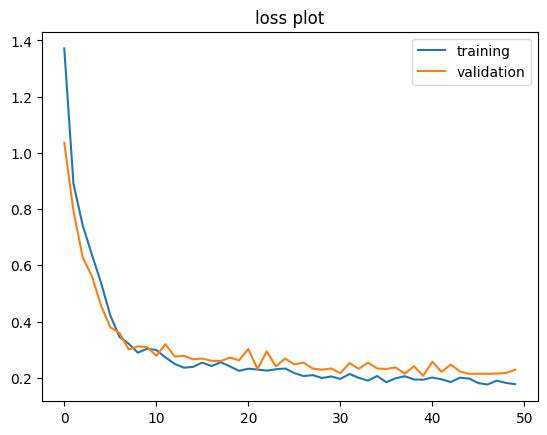

In [29]:
#Loss plot
import matplotlib.pyplot as plt
import seaborn as sns
training = history4.history['loss']
validation = history4.history['val_loss']
plt.plot(training,label='training')
plt.plot(validation,label='validation')
plt.title('loss plot')
plt.legend()
plt.show()

## B. Compare the accuracy using MAPE and MSE

In [30]:
# Predict stock prices
predicted_prices = model.predict(X_test)
# Inverse transform to get the actual prices
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predicted_prices)
print(f"MAPE: {mape:.2f}%")
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_prices)
print(f"MSE: {mse:.2f}")

3/3 [==============================] - 0s 13ms/step
MAPE: 0.50%
MSE: 0.16


## C. Comment on how many epochs (dropouts) is required for adequate learning.
#### To train this model effectively, we needed 50 epochs with learning rate as 0.001 and 4 dropout layers after every SimpleRNN layer.

## D. Plot the actual vs predicted values using the test data for the year 2020 and 2021 .

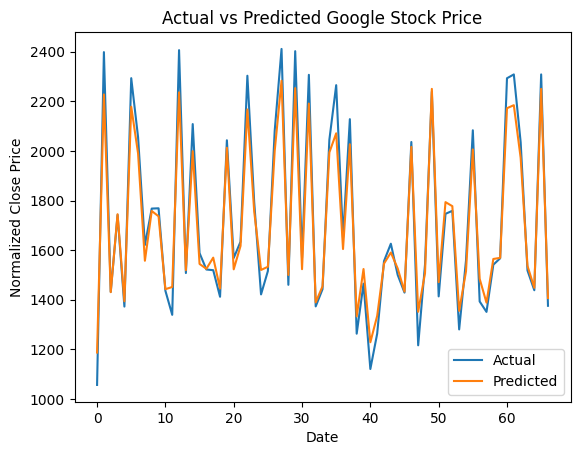

In [31]:
actual_price = scaler.inverse_transform(y_test)
#actual vs predicted stock price plot
plt.plot(actual_price[:, 0], label='Actual')
plt.plot(predicted_prices_actual[:, 0], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.title('Actual vs Predicted Google Stock Price')
plt.legend()
plt.show()